### Get ALL Cards

In [1]:
# get all cards
import json5
with open('cah-base-en.deck.json5', encoding='utf-8') as fh:
    d = json5.load(fh)
bc = d['calls']
flatten = lambda t:[item for sublist in t for item in sublist]
bc = ["".join([x if type(x) == str else '_' for x in flatten(d['calls'][i])]) for i in range(len(d['calls']))]
bc = [i.replace("__", "_") for i in bc]
# grab white cards
wc = d['responses']
print(bc[:10])
nbc = [i for i in bc if i.count('_') <= 3]

['Hey Reddit! I’m _.Ask me anything.', 'Introducing X-treme Baseball!It’s like baseball, but with _!', 'What is Batman’s guilty pleasure?_.', 'TSA guidelines now prohibit _ on airplanes.', 'Next from J.K. Rowling: _.', 'That’s right, I killed _.How, you ask?_.', 'I’m sorry professor, but I couldn’t complete my homework because of _.', 'And the Academy Award for _ goes to _.', 'Dude, do not go in that bathroom.There’s _ in there.', 'How did I lose my virginity?_.']


### Generating Card Combinations

In [39]:
# create all possible card combinations
# just brute force it!


import itertools
import random
from tqdm import tqdm
def make_card_combs_1slot(wcs, bcs):
    onec = wcs
    bcl = []
    wcl = []
    plays = []
    for bc in tqdm(bcs):
            t = bc
            ss = bc.split("_")
            b = [i.strip() for i in ss]
            for p in onec:
                bcl.append(t)
                wcl.append(p)
                s = b[0] + " " + p + " " +  b[1]
                s.replace(". ", " .")
                plays.append(s)
    return [i for i in plays if i != None], bcl, wcl

def sample_2slot(wcs,bcs,n_sample = 500):
    twoc = [i for i in itertools.permutations(wcs, 2)]
    plays = []
    bcl = []
    wcl = []
    for bc in tqdm(bcs):
        t = bc
        ss = bc.split("_")
        b = [i.strip() for i in ss]
        random.shuffle(twoc)
        sample_twoc = twoc[:n_sample]
        for p in sample_twoc:
            bcl.append(t)
            wcl.append(p)
            s = b[0] + " " + p[0] + " " +  b[1] + " " + p[1] + b[2]
            s.replace(". ", " .")
            plays.append(s)
    return [i for i in plays if i != None], bcl, wcl

def sample_3slot(wcs,bcs,n_sample = 500):
    #runs slowly and takes ~ 10gb memory. couldve optimize it better but im too lazy
    threec = [i for i in itertools.permutations(wcs, 3)]
    plays = []
    bcl = []
    wcl = []
    for bc in bcs:
        t = bc
        ss = bc.split("_")
        b = [i.strip() for i in ss]
        random.shuffle(threec)
        sample_threec = threec[:n_sample]
        for p in tqdm(sample_threec):
            bcl.append(t)
            wcl.append(p)
            s = b[0] + " " + p[0] + " " +  b[1] + " " + p[1] + b[2] + " " + p[2] + " " + b[3]
            s.replace(". ", " .")
            plays.append(s)
    return [i for i in plays if i != None], bcl, wcl

In [41]:
bc1 = [i for i in bc if i.count('_') == 1]
bc2 = [i for i in bc if i.count('_') == 2]
bc3 = [i for i in bc if i.count('_') == 3]

bcl = []
wcl = []

all_1slot_combs, a, b = make_card_combs_1slot(wc, bc1)
print(len(all_1slot_combs))
bcl += a
wcl+=b

sample_2slot_combs, a, b = sample_2slot(wc, bc2)
print(len(sample_2slot_combs))
bcl += a
wcl+=b

sample_3slot_combs, a, b = sample_3slot(wc, bc3)
print(len(sample_3slot_combs))
bcl += a
wcl+=b


100%|██████████| 66/66 [00:00<00:00, 3667.52it/s]

  8%|▊         | 1/12 [00:00<00:01,  9.20it/s]

33000



100%|██████████| 12/12 [00:01<00:00,  8.12it/s]


6000



100%|██████████| 500/500 [00:00<00:00, 501471.07it/s]

100%|██████████| 500/500 [00:00<00:00, 500872.22it/s]


1000


In [42]:
all_card_combs = all_1slot_combs + sample_2slot_combs + sample_3slot_combs
print(len(all_card_combs))

40000


### Generate Card Embeddings

In [23]:
#import necessary libraries
import pandas as pd
import random
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
avg_model = SentenceTransformer('average_word_embeddings_glove.6B.300d')


  0%|          | 0.00/245M [00:00<?, ?B/s]
  0%|          | 32.8k/245M [00:00<24:27, 167kB/s]
  0%|          | 65.5k/245M [00:00<25:09, 162kB/s]
  0%|          | 81.9k/245M [00:00<28:24, 144kB/s]
  0%|          | 115k/245M [00:00<26:10, 156kB/s] 
  0%|          | 147k/245M [00:01<30:40, 133kB/s]
  0%|          | 197k/245M [00:01<24:13, 168kB/s]
  0%|          | 229k/245M [00:01<22:36, 180kB/s]
  0%|          | 251k/245M [00:01<22:17, 183kB/s]
  0%|          | 279k/245M [00:01<22:15, 183kB/s]
  0%|          | 311k/245M [00:01<20:29, 199kB/s]
  0%|          | 344k/245M [00:01<19:28, 209kB/s]
  0%|          | 377k/245M [00:01<18:47, 217kB/s]
  0%|          | 410k/245M [00:02<18:17, 223kB/s]
  0%|          | 442k/245M [00:02<17:58, 227kB/s]
  0%|          | 475k/245M [00:02<19:25, 210kB/s]
  0%|          | 508k/245M [00:02<17:47, 229kB/s]
  0%|          | 541k/245M [00:02<17:52, 228kB/s]
  0%|          | 573k/245M [00:02<17:40, 230kB/s]
  0%|          | 606k/245M [00:02<17:16, 235kB/s]
  

  2%|▏         | 5.26M/245M [00:22<16:47, 238kB/s]
  2%|▏         | 5.29M/245M [00:22<16:46, 238kB/s]
  2%|▏         | 5.32M/245M [00:22<16:46, 238kB/s]
  2%|▏         | 5.36M/245M [00:23<16:48, 237kB/s]
  2%|▏         | 5.39M/245M [00:23<16:38, 240kB/s]
  2%|▏         | 5.42M/245M [00:23<16:38, 240kB/s]
  2%|▏         | 5.46M/245M [00:23<16:40, 239kB/s]
  2%|▏         | 5.49M/245M [00:23<16:43, 238kB/s]
  2%|▏         | 5.52M/245M [00:23<16:44, 238kB/s]
  2%|▏         | 5.55M/245M [00:23<16:33, 241kB/s]
  2%|▏         | 5.59M/245M [00:24<16:36, 240kB/s]
  2%|▏         | 5.62M/245M [00:24<16:41, 239kB/s]
  2%|▏         | 5.65M/245M [00:24<16:41, 239kB/s]
  2%|▏         | 5.69M/245M [00:24<16:42, 238kB/s]
  2%|▏         | 5.72M/245M [00:24<16:31, 241kB/s]
  2%|▏         | 5.75M/245M [00:24<16:37, 240kB/s]
  2%|▏         | 5.78M/245M [00:24<16:41, 239kB/s]
  2%|▏         | 5.82M/245M [00:24<16:39, 239kB/s]
  2%|▏         | 5.85M/245M [00:25<16:29, 241kB/s]
  2%|▏         | 5.88M/245M [00

  4%|▍         | 10.5M/245M [00:44<16:25, 238kB/s]
  4%|▍         | 10.5M/245M [00:44<16:11, 241kB/s]
  4%|▍         | 10.5M/245M [00:44<16:15, 240kB/s]
  4%|▍         | 10.5M/245M [00:45<25:24, 154kB/s]
  4%|▍         | 10.6M/245M [00:45<21:59, 177kB/s]
  4%|▍         | 10.7M/245M [00:45<17:27, 223kB/s]
  4%|▍         | 10.7M/245M [00:45<17:08, 228kB/s]
  4%|▍         | 10.7M/245M [00:45<17:30, 223kB/s]
  4%|▍         | 10.8M/245M [00:45<17:03, 229kB/s]
  4%|▍         | 10.8M/245M [00:46<16:59, 229kB/s]
  4%|▍         | 10.8M/245M [00:46<16:51, 231kB/s]
  4%|▍         | 10.9M/245M [00:46<16:40, 234kB/s]
  4%|▍         | 10.9M/245M [00:46<16:39, 234kB/s]
  4%|▍         | 10.9M/245M [00:46<16:19, 239kB/s]
  4%|▍         | 11.0M/245M [00:46<16:21, 238kB/s]
  4%|▍         | 11.0M/245M [00:46<16:22, 238kB/s]
  5%|▍         | 11.0M/245M [00:47<16:28, 236kB/s]
  5%|▍         | 11.1M/245M [00:47<16:22, 238kB/s]
  5%|▍         | 11.1M/245M [00:47<16:09, 241kB/s]
  5%|▍         | 11.1M/245M [00

  6%|▋         | 15.4M/245M [01:10<1:03:36, 60.1kB/s]
  6%|▋         | 15.4M/245M [01:10<57:05, 66.9kB/s]  
  6%|▋         | 15.4M/245M [01:11<53:25, 71.5kB/s]
  6%|▋         | 15.4M/245M [01:11<53:56, 70.8kB/s]
  6%|▋         | 15.5M/245M [01:11<54:26, 70.2kB/s]
  6%|▋         | 15.5M/245M [01:11<54:55, 69.6kB/s]
  6%|▋         | 15.5M/245M [01:12<57:37, 66.3kB/s]
  6%|▋         | 15.5M/245M [01:12<49:57, 76.5kB/s]
  6%|▋         | 15.5M/245M [01:12<44:31, 85.8kB/s]
  6%|▋         | 15.5M/245M [01:12<39:53, 95.8kB/s]
  6%|▋         | 15.5M/245M [01:12<37:57, 101kB/s] 
  6%|▋         | 15.6M/245M [01:12<36:24, 105kB/s]
  6%|▋         | 15.6M/245M [01:12<35:27, 108kB/s]
  6%|▋         | 15.6M/245M [01:13<34:30, 111kB/s]
  6%|▋         | 15.6M/245M [01:13<33:34, 114kB/s]
  6%|▋         | 15.6M/245M [01:13<33:03, 116kB/s]
  6%|▋         | 15.6M/245M [01:13<30:56, 123kB/s]
  6%|▋         | 15.7M/245M [01:13<30:34, 125kB/s]
  6%|▋         | 15.7M/245M [01:13<28:51, 132kB/s]
  6%|▋         |

  8%|▊         | 20.2M/245M [01:33<15:36, 240kB/s]
  8%|▊         | 20.3M/245M [01:33<15:40, 239kB/s]
  8%|▊         | 20.3M/245M [01:33<15:29, 242kB/s]
  8%|▊         | 20.3M/245M [01:33<15:35, 240kB/s]
  8%|▊         | 20.4M/245M [01:34<15:39, 239kB/s]
  8%|▊         | 20.4M/245M [01:34<15:40, 239kB/s]
  8%|▊         | 20.4M/245M [01:34<15:42, 238kB/s]
  8%|▊         | 20.5M/245M [01:34<15:32, 241kB/s]
  8%|▊         | 20.5M/245M [01:34<15:35, 240kB/s]
  8%|▊         | 20.5M/245M [01:34<15:41, 238kB/s]
  8%|▊         | 20.6M/245M [01:34<15:43, 238kB/s]
  8%|▊         | 20.6M/245M [01:34<15:42, 238kB/s]
  8%|▊         | 20.6M/245M [01:35<15:30, 241kB/s]
  8%|▊         | 20.7M/245M [01:35<15:39, 239kB/s]
  8%|▊         | 20.7M/245M [01:35<15:35, 239kB/s]
  8%|▊         | 20.7M/245M [01:35<23:46, 157kB/s]
  8%|▊         | 20.8M/245M [01:35<20:33, 182kB/s]
  9%|▊         | 20.8M/245M [01:36<16:41, 224kB/s]
  9%|▊         | 20.9M/245M [01:36<16:22, 228kB/s]
  9%|▊         | 20.9M/245M [01

 10%|█         | 25.4M/245M [01:55<20:51, 175kB/s]
 10%|█         | 25.5M/245M [01:55<16:50, 217kB/s]
 10%|█         | 25.5M/245M [01:55<16:23, 223kB/s]
 10%|█         | 25.5M/245M [01:56<16:28, 222kB/s]
 10%|█         | 25.6M/245M [01:56<15:42, 233kB/s]
 10%|█         | 25.6M/245M [01:56<15:35, 234kB/s]
 10%|█         | 25.6M/245M [01:56<15:34, 234kB/s]
 10%|█         | 25.7M/245M [01:56<15:32, 235kB/s]
 10%|█         | 25.7M/245M [01:56<15:16, 239kB/s]
 11%|█         | 25.7M/245M [01:56<15:17, 239kB/s]
 11%|█         | 25.8M/245M [01:57<17:24, 210kB/s]
 11%|█         | 25.8M/245M [01:57<25:36, 143kB/s]
 11%|█         | 25.9M/245M [01:57<21:00, 174kB/s]
 11%|█         | 25.9M/245M [01:57<16:59, 215kB/s]
 11%|█         | 26.0M/245M [01:57<16:55, 216kB/s]
 11%|█         | 26.0M/245M [01:58<16:24, 222kB/s]
 11%|█         | 26.0M/245M [01:58<16:00, 228kB/s]
 11%|█         | 26.1M/245M [01:58<15:51, 230kB/s]
 11%|█         | 26.1M/245M [01:58<15:37, 233kB/s]
 11%|█         | 26.1M/245M [01

 13%|█▎        | 30.7M/245M [02:18<15:06, 236kB/s]
 13%|█▎        | 30.7M/245M [02:18<15:04, 237kB/s]
 13%|█▎        | 30.7M/245M [02:18<15:06, 236kB/s]
 13%|█▎        | 30.8M/245M [02:18<15:02, 237kB/s]
 13%|█▎        | 30.8M/245M [02:18<14:53, 240kB/s]
 13%|█▎        | 30.8M/245M [02:18<14:54, 239kB/s]
 13%|█▎        | 30.9M/245M [02:18<14:57, 238kB/s]
 13%|█▎        | 30.9M/245M [02:18<14:55, 239kB/s]
 13%|█▎        | 30.9M/245M [02:19<14:50, 240kB/s]
 13%|█▎        | 30.9M/245M [02:19<21:58, 162kB/s]
 13%|█▎        | 31.0M/245M [02:19<17:00, 209kB/s]
 13%|█▎        | 31.1M/245M [02:19<16:17, 219kB/s]
 13%|█▎        | 31.1M/245M [02:19<15:51, 224kB/s]
 13%|█▎        | 31.1M/245M [02:19<15:35, 228kB/s]
 13%|█▎        | 31.2M/245M [02:20<15:24, 231kB/s]
 13%|█▎        | 31.2M/245M [02:20<15:17, 233kB/s]
 13%|█▎        | 31.2M/245M [02:20<15:03, 236kB/s]
 13%|█▎        | 31.3M/245M [02:20<15:01, 237kB/s]
 13%|█▎        | 31.3M/245M [02:20<15:00, 237kB/s]
 13%|█▎        | 31.3M/245M [02

 15%|█▍        | 36.0M/245M [02:40<15:53, 219kB/s]
 15%|█▍        | 36.0M/245M [02:40<15:30, 224kB/s]
 15%|█▍        | 36.0M/245M [02:40<15:16, 228kB/s]
 15%|█▍        | 36.1M/245M [02:40<14:45, 236kB/s]
 15%|█▍        | 36.1M/245M [02:40<16:11, 215kB/s]
 15%|█▍        | 36.1M/245M [02:41<16:13, 214kB/s]
 15%|█▍        | 36.2M/245M [02:41<15:47, 220kB/s]
 15%|█▍        | 36.2M/245M [02:41<15:25, 225kB/s]
 15%|█▍        | 36.2M/245M [02:41<15:42, 221kB/s]
 15%|█▍        | 36.3M/245M [02:41<15:24, 225kB/s]
 15%|█▍        | 36.3M/245M [02:41<15:23, 226kB/s]
 15%|█▍        | 36.3M/245M [02:41<15:06, 230kB/s]
 15%|█▍        | 36.3M/245M [02:42<18:25, 188kB/s]
 15%|█▍        | 36.4M/245M [02:42<18:05, 192kB/s]
 15%|█▍        | 36.4M/245M [02:42<17:06, 203kB/s]
 15%|█▍        | 36.4M/245M [02:42<16:22, 212kB/s]
 15%|█▍        | 36.5M/245M [02:42<16:09, 215kB/s]
 15%|█▍        | 36.5M/245M [02:42<15:57, 217kB/s]
 15%|█▍        | 36.5M/245M [02:42<15:34, 223kB/s]
 15%|█▍        | 36.6M/245M [02

 17%|█▋        | 41.3M/245M [03:04<14:20, 237kB/s]
 17%|█▋        | 41.3M/245M [03:04<14:20, 236kB/s]
 17%|█▋        | 41.4M/245M [03:04<14:07, 240kB/s]
 17%|█▋        | 41.4M/245M [03:04<14:11, 239kB/s]
 17%|█▋        | 41.4M/245M [03:04<14:12, 238kB/s]
 17%|█▋        | 41.5M/245M [03:05<14:13, 238kB/s]
 17%|█▋        | 41.5M/245M [03:05<14:13, 238kB/s]
 17%|█▋        | 41.5M/245M [03:05<14:04, 241kB/s]
 17%|█▋        | 41.6M/245M [03:05<14:06, 240kB/s]
 17%|█▋        | 41.6M/245M [03:05<14:08, 239kB/s]
 17%|█▋        | 41.6M/245M [03:05<14:11, 238kB/s]
 17%|█▋        | 41.7M/245M [03:05<14:11, 238kB/s]
 17%|█▋        | 41.7M/245M [03:06<14:02, 241kB/s]
 17%|█▋        | 41.7M/245M [03:06<14:07, 239kB/s]
 17%|█▋        | 41.8M/245M [03:06<14:09, 239kB/s]
 17%|█▋        | 41.8M/245M [03:06<14:16, 237kB/s]
 17%|█▋        | 41.8M/245M [03:06<14:11, 238kB/s]
 17%|█▋        | 41.9M/245M [03:06<14:01, 241kB/s]
 17%|█▋        | 41.9M/245M [03:06<14:07, 239kB/s]
 17%|█▋        | 41.9M/245M [03

 19%|█▉        | 46.5M/245M [03:26<13:48, 239kB/s]
 19%|█▉        | 46.6M/245M [03:26<13:49, 239kB/s]
 19%|█▉        | 46.6M/245M [03:26<13:51, 238kB/s]
 19%|█▉        | 46.6M/245M [03:26<13:46, 240kB/s]
 19%|█▉        | 46.7M/245M [03:26<13:46, 240kB/s]
 19%|█▉        | 46.7M/245M [03:26<13:51, 238kB/s]
 19%|█▉        | 46.7M/245M [03:27<13:53, 238kB/s]
 19%|█▉        | 46.8M/245M [03:27<21:55, 151kB/s]
 19%|█▉        | 46.8M/245M [03:27<18:12, 181kB/s]
 19%|█▉        | 46.9M/245M [03:27<14:24, 229kB/s]
 19%|█▉        | 46.9M/245M [03:27<13:54, 237kB/s]
 19%|█▉        | 47.0M/245M [03:28<13:48, 239kB/s]
 19%|█▉        | 47.0M/245M [03:28<14:07, 233kB/s]
 19%|█▉        | 47.0M/245M [03:28<14:02, 235kB/s]
 19%|█▉        | 47.1M/245M [03:28<14:00, 235kB/s]
 19%|█▉        | 47.1M/245M [03:28<13:46, 239kB/s]
 19%|█▉        | 47.1M/245M [03:28<13:47, 239kB/s]
 19%|█▉        | 47.2M/245M [03:28<13:50, 238kB/s]
 19%|█▉        | 47.2M/245M [03:29<13:49, 238kB/s]
 19%|█▉        | 47.2M/245M [03

 21%|██        | 51.9M/245M [03:48<13:25, 239kB/s]
 21%|██        | 51.9M/245M [03:48<13:25, 239kB/s]
 21%|██        | 51.9M/245M [03:48<13:28, 238kB/s]
 21%|██        | 52.0M/245M [03:48<13:34, 237kB/s]
 21%|██        | 52.0M/245M [03:49<13:17, 242kB/s]
 21%|██▏       | 52.0M/245M [03:49<13:21, 240kB/s]
 21%|██▏       | 52.1M/245M [03:49<13:27, 239kB/s]
 21%|██▏       | 52.1M/245M [03:49<13:27, 239kB/s]
 21%|██▏       | 52.1M/245M [03:49<13:29, 238kB/s]
 21%|██▏       | 52.2M/245M [03:49<13:19, 241kB/s]
 21%|██▏       | 52.2M/245M [03:49<13:22, 240kB/s]
 21%|██▏       | 52.2M/245M [03:50<13:24, 239kB/s]
 21%|██▏       | 52.3M/245M [03:50<13:31, 237kB/s]
 21%|██▏       | 52.3M/245M [03:50<13:17, 241kB/s]
 21%|██▏       | 52.3M/245M [03:50<13:19, 241kB/s]
 21%|██▏       | 52.4M/245M [03:50<22:37, 142kB/s]
 21%|██▏       | 52.4M/245M [03:50<18:19, 175kB/s]
 21%|██▏       | 52.5M/245M [03:51<14:42, 218kB/s]
 21%|██▏       | 52.5M/245M [03:51<14:18, 224kB/s]
 21%|██▏       | 52.5M/245M [03

 23%|██▎       | 57.1M/245M [04:10<12:58, 241kB/s]
 23%|██▎       | 57.2M/245M [04:10<13:02, 240kB/s]
 23%|██▎       | 57.2M/245M [04:10<13:04, 239kB/s]
 23%|██▎       | 57.2M/245M [04:10<13:07, 238kB/s]
 23%|██▎       | 57.3M/245M [04:11<14:24, 217kB/s]
 23%|██▎       | 57.3M/245M [04:11<13:07, 238kB/s]
 23%|██▎       | 57.3M/245M [04:11<13:09, 237kB/s]
 23%|██▎       | 57.4M/245M [04:11<13:08, 238kB/s]
 23%|██▎       | 57.4M/245M [04:11<13:09, 237kB/s]
 23%|██▎       | 57.4M/245M [04:11<12:56, 241kB/s]
 23%|██▎       | 57.5M/245M [04:12<13:02, 239kB/s]
 23%|██▎       | 57.5M/245M [04:12<13:03, 239kB/s]
 24%|██▎       | 57.5M/245M [04:12<13:04, 239kB/s]
 24%|██▎       | 57.6M/245M [04:12<13:06, 238kB/s]
 24%|██▎       | 57.6M/245M [04:12<12:56, 241kB/s]
 24%|██▎       | 57.6M/245M [04:12<13:07, 238kB/s]
 24%|██▎       | 57.7M/245M [04:12<13:05, 238kB/s]
 24%|██▎       | 57.7M/245M [04:12<13:05, 238kB/s]
 24%|██▎       | 57.7M/245M [04:13<12:55, 241kB/s]
 24%|██▎       | 57.8M/245M [04

 25%|██▌       | 62.4M/245M [04:32<12:45, 238kB/s]
 26%|██▌       | 62.4M/245M [04:32<12:42, 239kB/s]
 26%|██▌       | 62.5M/245M [04:33<12:43, 239kB/s]
 26%|██▌       | 62.5M/245M [04:33<12:37, 241kB/s]
 26%|██▌       | 62.5M/245M [04:33<12:39, 240kB/s]
 26%|██▌       | 62.6M/245M [04:33<12:41, 239kB/s]
 26%|██▌       | 62.6M/245M [04:33<12:43, 238kB/s]
 26%|██▌       | 62.6M/245M [04:33<12:45, 238kB/s]
 26%|██▌       | 62.7M/245M [04:33<12:37, 240kB/s]
 26%|██▌       | 62.7M/245M [04:34<12:39, 240kB/s]
 26%|██▌       | 62.7M/245M [04:34<12:39, 240kB/s]
 26%|██▌       | 62.8M/245M [04:34<12:40, 239kB/s]
 26%|██▌       | 62.8M/245M [04:34<12:36, 240kB/s]
 26%|██▌       | 62.8M/245M [04:34<12:37, 240kB/s]
 26%|██▌       | 62.8M/245M [04:34<12:42, 238kB/s]
 26%|██▌       | 62.9M/245M [04:34<12:41, 239kB/s]
 26%|██▌       | 62.9M/245M [04:35<12:45, 237kB/s]
 26%|██▌       | 62.9M/245M [04:35<12:33, 241kB/s]
 26%|██▌       | 63.0M/245M [04:35<12:42, 238kB/s]
 26%|██▌       | 63.0M/245M [04

 28%|██▊       | 67.6M/245M [04:55<12:21, 239kB/s]
 28%|██▊       | 67.7M/245M [04:55<12:20, 239kB/s]
 28%|██▊       | 67.7M/245M [04:55<12:21, 239kB/s]
 28%|██▊       | 67.7M/245M [04:55<12:22, 238kB/s]
 28%|██▊       | 67.8M/245M [04:55<12:25, 237kB/s]
 28%|██▊       | 67.8M/245M [04:55<12:17, 240kB/s]
 28%|██▊       | 67.8M/245M [04:55<12:15, 240kB/s]
 28%|██▊       | 67.9M/245M [04:55<12:19, 239kB/s]
 28%|██▊       | 67.9M/245M [04:56<12:20, 239kB/s]
 28%|██▊       | 67.9M/245M [04:56<12:12, 241kB/s]
 28%|██▊       | 68.0M/245M [04:56<12:15, 240kB/s]
 28%|██▊       | 68.0M/245M [04:56<12:19, 239kB/s]
 28%|██▊       | 68.0M/245M [04:56<12:19, 239kB/s]
 28%|██▊       | 68.1M/245M [04:56<12:26, 237kB/s]
 28%|██▊       | 68.1M/245M [04:56<12:10, 242kB/s]
 28%|██▊       | 68.1M/245M [04:57<12:14, 241kB/s]
 28%|██▊       | 68.2M/245M [04:57<12:17, 239kB/s]
 28%|██▊       | 68.2M/245M [04:57<12:18, 239kB/s]
 28%|██▊       | 68.2M/245M [04:57<12:19, 239kB/s]
 28%|██▊       | 68.3M/245M [04

 30%|██▉       | 72.9M/245M [05:17<11:56, 240kB/s]
 30%|██▉       | 72.9M/245M [05:17<11:57, 239kB/s]
 30%|██▉       | 73.0M/245M [05:17<18:26, 155kB/s]
 30%|██▉       | 73.0M/245M [05:17<14:20, 200kB/s]
 30%|██▉       | 73.1M/245M [05:17<13:36, 210kB/s]
 30%|██▉       | 73.1M/245M [05:17<13:07, 218kB/s]
 30%|██▉       | 73.1M/245M [05:18<12:47, 223kB/s]
 30%|██▉       | 73.2M/245M [05:18<12:27, 230kB/s]
 30%|██▉       | 73.2M/245M [05:18<12:16, 233kB/s]
 30%|██▉       | 73.2M/245M [05:18<12:14, 233kB/s]
 30%|██▉       | 73.3M/245M [05:18<12:08, 235kB/s]
 30%|██▉       | 73.3M/245M [05:19<19:05, 150kB/s]
 30%|██▉       | 73.4M/245M [05:19<14:46, 193kB/s]
 30%|███       | 73.4M/245M [05:19<13:57, 204kB/s]
 30%|███       | 73.5M/245M [05:19<13:11, 216kB/s]
 30%|███       | 73.5M/245M [05:19<12:59, 220kB/s]
 30%|███       | 73.5M/245M [05:19<12:38, 226kB/s]
 30%|███       | 73.6M/245M [05:19<12:26, 229kB/s]
 30%|███       | 73.6M/245M [05:20<12:21, 231kB/s]
 30%|███       | 73.6M/245M [05

 32%|███▏      | 78.2M/245M [05:39<11:41, 238kB/s]
 32%|███▏      | 78.2M/245M [05:39<11:40, 238kB/s]
 32%|███▏      | 78.2M/245M [05:39<11:40, 238kB/s]
 32%|███▏      | 78.2M/245M [05:39<11:32, 240kB/s]
 32%|███▏      | 78.3M/245M [05:40<19:44, 141kB/s]
 32%|███▏      | 78.3M/245M [05:40<15:56, 174kB/s]
 32%|███▏      | 78.4M/245M [05:40<13:03, 212kB/s]
 32%|███▏      | 78.4M/245M [05:40<12:41, 218kB/s]
 32%|███▏      | 78.5M/245M [05:40<12:20, 224kB/s]
 32%|███▏      | 78.5M/245M [05:40<12:09, 228kB/s]
 32%|███▏      | 78.5M/245M [05:40<11:52, 233kB/s]
 32%|███▏      | 78.6M/245M [05:41<11:47, 235kB/s]
 32%|███▏      | 78.6M/245M [05:41<11:44, 236kB/s]
 32%|███▏      | 78.6M/245M [05:41<11:42, 236kB/s]
 32%|███▏      | 78.7M/245M [05:41<11:42, 236kB/s]
 32%|███▏      | 78.7M/245M [05:41<11:31, 240kB/s]
 32%|███▏      | 78.7M/245M [05:41<11:34, 239kB/s]
 32%|███▏      | 78.8M/245M [05:41<11:35, 239kB/s]
 32%|███▏      | 78.8M/245M [05:42<11:37, 238kB/s]
 32%|███▏      | 78.8M/245M [05

 34%|███▍      | 83.4M/245M [06:01<11:15, 239kB/s]
 34%|███▍      | 83.5M/245M [06:01<17:10, 156kB/s]
 34%|███▍      | 83.5M/245M [06:01<14:36, 184kB/s]
 34%|███▍      | 83.6M/245M [06:02<11:41, 230kB/s]
 34%|███▍      | 83.6M/245M [06:02<12:04, 222kB/s]
 34%|███▍      | 83.7M/245M [06:02<11:11, 240kB/s]
 34%|███▍      | 83.7M/245M [06:02<11:18, 237kB/s]
 34%|███▍      | 83.7M/245M [06:02<11:12, 240kB/s]
 34%|███▍      | 83.8M/245M [06:02<11:07, 241kB/s]
 34%|███▍      | 83.8M/245M [06:02<11:09, 240kB/s]
 34%|███▍      | 83.8M/245M [06:03<11:11, 240kB/s]
 34%|███▍      | 83.9M/245M [06:03<11:15, 238kB/s]
 34%|███▍      | 83.9M/245M [06:03<11:14, 239kB/s]
 34%|███▍      | 83.9M/245M [06:03<11:05, 241kB/s]
 34%|███▍      | 84.0M/245M [06:03<11:10, 240kB/s]
 34%|███▍      | 84.0M/245M [06:03<17:34, 152kB/s]
 34%|███▍      | 84.1M/245M [06:04<13:32, 198kB/s]
 34%|███▍      | 84.1M/245M [06:04<12:40, 211kB/s]
 34%|███▍      | 84.1M/245M [06:04<12:19, 217kB/s]
 34%|███▍      | 84.2M/245M [06

 36%|███▋      | 88.7M/245M [06:23<14:39, 177kB/s]
 36%|███▋      | 88.8M/245M [06:24<12:43, 204kB/s]
 36%|███▋      | 88.9M/245M [06:24<10:07, 257kB/s]
 36%|███▋      | 88.9M/245M [06:24<10:03, 258kB/s]
 36%|███▋      | 88.9M/245M [06:24<10:21, 251kB/s]
 36%|███▋      | 88.9M/245M [06:24<10:44, 242kB/s]
 36%|███▋      | 89.0M/245M [06:24<10:53, 238kB/s]
 36%|███▋      | 89.0M/245M [06:24<10:46, 241kB/s]
 36%|███▋      | 89.0M/245M [06:24<10:48, 240kB/s]
 36%|███▋      | 89.1M/245M [06:25<10:50, 239kB/s]
 36%|███▋      | 89.1M/245M [06:25<10:52, 238kB/s]
 36%|███▋      | 89.1M/245M [06:25<10:53, 238kB/s]
 36%|███▋      | 89.2M/245M [06:25<17:03, 152kB/s]
 36%|███▋      | 89.2M/245M [06:25<14:06, 184kB/s]
 36%|███▋      | 89.3M/245M [06:26<11:27, 226kB/s]
 37%|███▋      | 89.4M/245M [06:26<11:17, 229kB/s]
 37%|███▋      | 89.4M/245M [06:26<11:09, 232kB/s]
 37%|███▋      | 89.4M/245M [06:26<11:04, 234kB/s]
 37%|███▋      | 89.5M/245M [06:26<11:33, 224kB/s]
 37%|███▋      | 89.5M/245M [06

 38%|███▊      | 94.1M/245M [06:46<10:26, 240kB/s]
 38%|███▊      | 94.1M/245M [06:46<10:28, 240kB/s]
 38%|███▊      | 94.2M/245M [06:46<10:31, 238kB/s]
 38%|███▊      | 94.2M/245M [06:46<10:35, 237kB/s]
 39%|███▊      | 94.2M/245M [06:46<10:31, 238kB/s]
 39%|███▊      | 94.3M/245M [06:46<10:22, 242kB/s]
 39%|███▊      | 94.3M/245M [06:46<10:26, 240kB/s]
 39%|███▊      | 94.3M/245M [06:47<10:28, 239kB/s]
 39%|███▊      | 94.4M/245M [06:47<10:29, 239kB/s]
 39%|███▊      | 94.4M/245M [06:47<10:24, 241kB/s]
 39%|███▊      | 94.4M/245M [06:47<10:26, 240kB/s]
 39%|███▊      | 94.5M/245M [06:47<10:28, 239kB/s]
 39%|███▊      | 94.5M/245M [06:47<10:29, 239kB/s]
 39%|███▊      | 94.5M/245M [06:47<10:30, 238kB/s]
 39%|███▊      | 94.6M/245M [06:48<10:22, 241kB/s]
 39%|███▊      | 94.6M/245M [06:48<10:30, 238kB/s]
 39%|███▊      | 94.6M/245M [06:48<10:28, 239kB/s]
 39%|███▊      | 94.7M/245M [06:48<10:27, 239kB/s]
 39%|███▊      | 94.7M/245M [06:48<10:28, 239kB/s]
 39%|███▊      | 94.7M/245M [06

 41%|████      | 99.4M/245M [07:08<10:10, 238kB/s]
 41%|████      | 99.4M/245M [07:08<10:02, 241kB/s]
 41%|████      | 99.4M/245M [07:08<10:05, 240kB/s]
 41%|████      | 99.5M/245M [07:08<10:05, 240kB/s]
 41%|████      | 99.5M/245M [07:08<10:09, 238kB/s]
 41%|████      | 99.5M/245M [07:08<10:03, 241kB/s]
 41%|████      | 99.5M/245M [07:09<10:05, 240kB/s]
 41%|████      | 99.6M/245M [07:09<10:06, 239kB/s]
 41%|████      | 99.6M/245M [07:09<10:00, 242kB/s]
 41%|████      | 99.6M/245M [07:09<10:04, 240kB/s]
 41%|████      | 99.7M/245M [07:09<10:08, 238kB/s]
 41%|████      | 99.7M/245M [07:09<10:05, 239kB/s]
 41%|████      | 99.7M/245M [07:09<10:06, 239kB/s]
 41%|████      | 99.8M/245M [07:10<10:00, 241kB/s]
 41%|████      | 99.8M/245M [07:10<10:06, 239kB/s]
 41%|████      | 99.8M/245M [07:10<10:04, 240kB/s]
 41%|████      | 99.9M/245M [07:10<10:07, 239kB/s]
 41%|████      | 99.9M/245M [07:10<15:50, 152kB/s]
 41%|████      | 100M/245M [07:10<13:06, 184kB/s] 
 41%|████      | 100M/245M [07:

 43%|████▎     | 105M/245M [07:30<09:45, 239kB/s]
 43%|████▎     | 105M/245M [07:31<09:47, 238kB/s]
 43%|████▎     | 105M/245M [07:31<09:39, 241kB/s]
 43%|████▎     | 105M/245M [07:31<09:43, 240kB/s]
 43%|████▎     | 105M/245M [07:31<09:44, 239kB/s]
 43%|████▎     | 105M/245M [07:31<09:45, 239kB/s]
 43%|████▎     | 105M/245M [07:31<09:46, 238kB/s]
 43%|████▎     | 105M/245M [07:31<09:41, 240kB/s]
 43%|████▎     | 105M/245M [07:32<09:40, 241kB/s]
 43%|████▎     | 105M/245M [07:32<09:42, 240kB/s]
 43%|████▎     | 105M/245M [07:32<09:44, 239kB/s]
 43%|████▎     | 105M/245M [07:32<09:38, 241kB/s]
 43%|████▎     | 105M/245M [07:32<09:42, 240kB/s]
 43%|████▎     | 105M/245M [07:32<09:43, 239kB/s]
 43%|████▎     | 105M/245M [07:32<09:44, 239kB/s]
 43%|████▎     | 105M/245M [07:33<09:45, 238kB/s]
 43%|████▎     | 105M/245M [07:33<09:39, 241kB/s]
 43%|████▎     | 105M/245M [07:33<10:09, 229kB/s]
 43%|████▎     | 105M/245M [07:33<09:33, 243kB/s]
 43%|████▎     | 105M/245M [07:33<09:44, 238kB/s]


 45%|████▍     | 110M/245M [07:53<09:29, 236kB/s]
 45%|████▍     | 110M/245M [07:53<09:28, 237kB/s]
 45%|████▌     | 110M/245M [07:54<09:43, 231kB/s]
 45%|████▌     | 110M/245M [07:54<15:51, 141kB/s]
 45%|████▌     | 110M/245M [07:54<13:32, 165kB/s]
 45%|████▌     | 110M/245M [07:54<10:36, 211kB/s]
 45%|████▌     | 110M/245M [07:54<10:32, 213kB/s]
 45%|████▌     | 110M/245M [07:54<10:17, 217kB/s]
 45%|████▌     | 110M/245M [07:55<09:59, 224kB/s]
 45%|████▌     | 110M/245M [07:55<09:48, 228kB/s]
 45%|████▌     | 110M/245M [07:55<09:41, 231kB/s]
 45%|████▌     | 110M/245M [07:55<09:35, 233kB/s]
 45%|████▌     | 111M/245M [07:55<09:51, 227kB/s]
 45%|████▌     | 111M/245M [07:55<09:35, 233kB/s]
 45%|████▌     | 111M/245M [07:55<09:51, 227kB/s]
 45%|████▌     | 111M/245M [07:56<09:46, 228kB/s]
 45%|████▌     | 111M/245M [07:56<09:39, 231kB/s]
 45%|████▌     | 111M/245M [07:56<09:27, 236kB/s]
 45%|████▌     | 111M/245M [07:56<09:29, 235kB/s]
 45%|████▌     | 111M/245M [07:56<09:26, 237kB/s]


 47%|████▋     | 116M/245M [08:16<09:07, 236kB/s]
 47%|████▋     | 116M/245M [08:17<09:07, 236kB/s]
 47%|████▋     | 116M/245M [08:17<08:58, 240kB/s]
 47%|████▋     | 116M/245M [08:17<08:59, 239kB/s]
 47%|████▋     | 116M/245M [08:17<13:32, 159kB/s]
 47%|████▋     | 116M/245M [08:17<10:19, 208kB/s]
 47%|████▋     | 116M/245M [08:17<09:39, 223kB/s]
 47%|████▋     | 116M/245M [08:18<09:25, 228kB/s]
 47%|████▋     | 116M/245M [08:18<09:26, 228kB/s]
 47%|████▋     | 116M/245M [08:18<09:30, 226kB/s]
 47%|████▋     | 116M/245M [08:18<09:21, 229kB/s]
 47%|████▋     | 116M/245M [08:18<09:15, 232kB/s]
 47%|████▋     | 116M/245M [08:18<09:44, 220kB/s]
 47%|████▋     | 116M/245M [08:18<09:13, 233kB/s]
 47%|████▋     | 116M/245M [08:19<08:58, 239kB/s]
 47%|████▋     | 116M/245M [08:19<09:01, 238kB/s]
 47%|████▋     | 116M/245M [08:19<09:00, 238kB/s]
 47%|████▋     | 116M/245M [08:19<09:00, 238kB/s]
 47%|████▋     | 116M/245M [08:19<13:45, 156kB/s]
 48%|████▊     | 116M/245M [08:20<11:24, 188kB/s]


 49%|████▉     | 121M/245M [08:39<08:49, 234kB/s]
 49%|████▉     | 121M/245M [08:39<08:40, 238kB/s]
 49%|████▉     | 121M/245M [08:39<08:44, 236kB/s]
 49%|████▉     | 121M/245M [08:40<08:43, 236kB/s]
 49%|████▉     | 121M/245M [08:40<08:40, 237kB/s]
 50%|████▉     | 121M/245M [08:40<08:41, 237kB/s]
 50%|████▉     | 121M/245M [08:40<08:34, 240kB/s]
 50%|████▉     | 121M/245M [08:40<08:38, 238kB/s]
 50%|████▉     | 121M/245M [08:41<13:35, 152kB/s]
 50%|████▉     | 121M/245M [08:41<10:24, 198kB/s]
 50%|████▉     | 121M/245M [08:41<09:44, 211kB/s]
 50%|████▉     | 121M/245M [08:41<09:28, 217kB/s]
 50%|████▉     | 121M/245M [08:41<09:19, 220kB/s]
 50%|████▉     | 121M/245M [08:41<09:00, 228kB/s]
 50%|████▉     | 122M/245M [08:41<08:53, 231kB/s]
 50%|████▉     | 122M/245M [08:42<09:07, 225kB/s]
 50%|████▉     | 122M/245M [08:42<08:57, 229kB/s]
 50%|████▉     | 122M/245M [08:42<08:53, 231kB/s]
 50%|████▉     | 122M/245M [08:42<08:40, 236kB/s]
 50%|████▉     | 122M/245M [08:42<08:40, 236kB/s]


 52%|█████▏    | 126M/245M [09:02<08:12, 240kB/s]
 52%|█████▏    | 126M/245M [09:02<08:13, 240kB/s]
 52%|█████▏    | 126M/245M [09:02<08:17, 238kB/s]
 52%|█████▏    | 127M/245M [09:02<08:17, 238kB/s]
 52%|█████▏    | 127M/245M [09:03<08:11, 240kB/s]
 52%|█████▏    | 127M/245M [09:03<08:11, 240kB/s]
 52%|█████▏    | 127M/245M [09:03<08:16, 238kB/s]
 52%|█████▏    | 127M/245M [09:03<08:15, 239kB/s]
 52%|█████▏    | 127M/245M [09:03<08:15, 238kB/s]
 52%|█████▏    | 127M/245M [09:03<08:09, 241kB/s]
 52%|█████▏    | 127M/245M [09:03<08:12, 240kB/s]
 52%|█████▏    | 127M/245M [09:04<08:14, 239kB/s]
 52%|█████▏    | 127M/245M [09:04<08:14, 238kB/s]
 52%|█████▏    | 127M/245M [09:04<08:14, 238kB/s]
 52%|█████▏    | 127M/245M [09:04<08:08, 241kB/s]
 52%|█████▏    | 127M/245M [09:04<08:11, 240kB/s]
 52%|█████▏    | 127M/245M [09:04<11:48, 166kB/s]
 52%|█████▏    | 127M/245M [09:04<10:16, 191kB/s]
 52%|█████▏    | 127M/245M [09:05<09:34, 205kB/s]
 52%|█████▏    | 127M/245M [09:05<12:26, 158kB/s]


 54%|█████▍    | 132M/245M [09:39<08:49, 214kB/s]
 54%|█████▍    | 132M/245M [09:39<08:31, 221kB/s]
 54%|█████▍    | 132M/245M [09:39<08:15, 228kB/s]
 54%|█████▍    | 132M/245M [09:40<08:10, 230kB/s]
 54%|█████▍    | 132M/245M [09:40<08:04, 233kB/s]
 54%|█████▍    | 132M/245M [09:40<08:03, 233kB/s]
 54%|█████▍    | 132M/245M [09:40<08:00, 235kB/s]
 54%|█████▍    | 132M/245M [09:40<07:53, 238kB/s]
 54%|█████▍    | 132M/245M [09:40<07:53, 238kB/s]
 54%|█████▍    | 132M/245M [09:40<07:53, 238kB/s]
 54%|█████▍    | 132M/245M [09:40<07:53, 238kB/s]
 54%|█████▍    | 132M/245M [09:41<07:47, 241kB/s]
 54%|█████▍    | 132M/245M [09:41<13:02, 144kB/s]
 54%|█████▍    | 132M/245M [09:41<11:13, 167kB/s]
 54%|█████▍    | 132M/245M [09:41<08:48, 213kB/s]
 54%|█████▍    | 132M/245M [09:41<08:24, 223kB/s]
 54%|█████▍    | 132M/245M [09:42<08:15, 227kB/s]
 54%|█████▍    | 132M/245M [09:42<08:08, 230kB/s]
 54%|█████▍    | 132M/245M [09:42<08:04, 232kB/s]
 54%|█████▍    | 132M/245M [09:42<07:55, 236kB/s]


 56%|█████▌    | 136M/245M [10:04<08:00, 226kB/s]
 56%|█████▌    | 137M/245M [10:04<07:47, 232kB/s]
 56%|█████▌    | 137M/245M [10:05<22:52, 78.9kB/s]
 56%|█████▌    | 137M/245M [10:05<18:10, 99.2kB/s]
 56%|█████▌    | 137M/245M [10:06<17:45, 101kB/s] 
 56%|█████▌    | 137M/245M [10:06<13:18, 135kB/s]
 56%|█████▌    | 137M/245M [10:06<11:32, 156kB/s]
 56%|█████▌    | 137M/245M [10:06<10:24, 173kB/s]
 56%|█████▌    | 137M/245M [10:06<09:30, 189kB/s]
 56%|█████▌    | 137M/245M [10:06<08:49, 204kB/s]
 56%|█████▌    | 137M/245M [10:07<08:27, 213kB/s]
 56%|█████▌    | 137M/245M [10:07<08:10, 220kB/s]
 56%|█████▌    | 137M/245M [10:07<07:59, 225kB/s]
 56%|█████▌    | 137M/245M [10:07<07:52, 228kB/s]
 56%|█████▌    | 137M/245M [10:07<07:41, 233kB/s]
 56%|█████▌    | 137M/245M [10:07<07:39, 234kB/s]
 56%|█████▌    | 137M/245M [10:07<07:37, 235kB/s]
 56%|█████▌    | 137M/245M [10:08<07:37, 236kB/s]
 56%|█████▌    | 137M/245M [10:08<07:34, 237kB/s]
 56%|█████▌    | 137M/245M [10:08<07:28, 240kB/

 58%|█████▊    | 142M/245M [10:28<07:16, 236kB/s]
 58%|█████▊    | 142M/245M [10:28<07:14, 237kB/s]
 58%|█████▊    | 142M/245M [10:28<07:13, 237kB/s]
 58%|█████▊    | 142M/245M [10:28<07:09, 240kB/s]
 58%|█████▊    | 142M/245M [10:28<07:10, 239kB/s]
 58%|█████▊    | 142M/245M [10:28<07:11, 238kB/s]
 58%|█████▊    | 142M/245M [10:29<11:39, 147kB/s]
 58%|█████▊    | 142M/245M [10:29<09:04, 188kB/s]
 58%|█████▊    | 142M/245M [10:29<08:29, 201kB/s]
 58%|█████▊    | 142M/245M [10:29<08:05, 211kB/s]
 58%|█████▊    | 142M/245M [10:29<07:49, 219kB/s]
 58%|█████▊    | 142M/245M [10:29<07:33, 226kB/s]
 58%|█████▊    | 142M/245M [10:30<07:28, 228kB/s]
 58%|█████▊    | 142M/245M [10:30<07:21, 232kB/s]
 58%|█████▊    | 142M/245M [10:30<07:18, 233kB/s]
 58%|█████▊    | 142M/245M [10:30<07:11, 237kB/s]
 58%|█████▊    | 142M/245M [10:30<07:10, 238kB/s]
 58%|█████▊    | 142M/245M [10:30<07:10, 238kB/s]
 58%|█████▊    | 142M/245M [10:30<07:10, 238kB/s]
 58%|█████▊    | 142M/245M [10:31<07:10, 238kB/s]


 60%|█████▉    | 147M/245M [10:52<12:02, 136kB/s]
 60%|█████▉    | 147M/245M [10:52<11:11, 146kB/s]
 60%|██████    | 147M/245M [10:52<12:07, 135kB/s]
 60%|██████    | 147M/245M [10:53<11:06, 147kB/s]
 60%|██████    | 147M/245M [10:53<10:11, 160kB/s]
 60%|██████    | 147M/245M [10:53<09:26, 173kB/s]
 60%|██████    | 147M/245M [10:53<09:16, 176kB/s]
 60%|██████    | 147M/245M [10:53<08:36, 189kB/s]
 60%|██████    | 147M/245M [10:53<09:23, 173kB/s]
 60%|██████    | 147M/245M [10:54<08:42, 187kB/s]
 60%|██████    | 147M/245M [10:54<08:07, 200kB/s]
 60%|██████    | 147M/245M [10:54<07:52, 206kB/s]
 60%|██████    | 147M/245M [10:54<07:33, 215kB/s]
 60%|██████    | 147M/245M [10:54<08:03, 202kB/s]
 60%|██████    | 147M/245M [10:54<08:01, 202kB/s]
 60%|██████    | 147M/245M [10:54<08:13, 198kB/s]
 60%|██████    | 147M/245M [10:55<13:18, 122kB/s]
 60%|██████    | 147M/245M [10:55<11:35, 140kB/s]
 60%|██████    | 147M/245M [10:55<09:03, 179kB/s]
 60%|██████    | 147M/245M [10:55<08:42, 186kB/s]


 62%|██████▏   | 152M/245M [11:15<07:17, 212kB/s]
 62%|██████▏   | 152M/245M [11:16<07:04, 218kB/s]
 62%|██████▏   | 152M/245M [11:16<07:00, 220kB/s]
 62%|██████▏   | 152M/245M [11:16<06:49, 226kB/s]
 62%|██████▏   | 152M/245M [11:16<06:43, 229kB/s]
 62%|██████▏   | 152M/245M [11:16<06:40, 231kB/s]
 62%|██████▏   | 152M/245M [11:16<06:36, 233kB/s]
 62%|██████▏   | 152M/245M [11:16<06:30, 237kB/s]
 62%|██████▏   | 152M/245M [11:17<06:29, 237kB/s]
 62%|██████▏   | 152M/245M [11:17<06:29, 237kB/s]
 62%|██████▏   | 152M/245M [11:17<06:29, 237kB/s]
 62%|██████▏   | 152M/245M [11:17<06:28, 237kB/s]
 62%|██████▏   | 153M/245M [11:17<06:23, 241kB/s]
 62%|██████▏   | 153M/245M [11:17<06:25, 239kB/s]
 62%|██████▏   | 153M/245M [11:17<06:25, 239kB/s]
 62%|██████▏   | 153M/245M [11:18<06:25, 239kB/s]
 62%|██████▏   | 153M/245M [11:18<06:26, 238kB/s]
 62%|██████▏   | 153M/245M [11:18<06:23, 240kB/s]
 62%|██████▏   | 153M/245M [11:18<06:23, 240kB/s]
 62%|██████▏   | 153M/245M [11:18<06:24, 239kB/s]


 64%|██████▍   | 157M/245M [11:38<06:09, 236kB/s]
 64%|██████▍   | 158M/245M [11:38<06:09, 236kB/s]
 64%|██████▍   | 158M/245M [11:38<06:08, 237kB/s]
 64%|██████▍   | 158M/245M [11:38<06:02, 240kB/s]
 64%|██████▍   | 158M/245M [11:39<06:04, 239kB/s]
 64%|██████▍   | 158M/245M [11:39<06:04, 239kB/s]
 64%|██████▍   | 158M/245M [11:39<06:04, 239kB/s]
 64%|██████▍   | 158M/245M [11:39<06:00, 242kB/s]
 64%|██████▍   | 158M/245M [11:39<09:49, 147kB/s]
 64%|██████▍   | 158M/245M [11:40<07:40, 189kB/s]
 65%|██████▍   | 158M/245M [11:40<07:07, 203kB/s]
 65%|██████▍   | 158M/245M [11:40<06:48, 212kB/s]
 65%|██████▍   | 158M/245M [11:40<06:36, 219kB/s]
 65%|██████▍   | 158M/245M [11:40<06:25, 225kB/s]
 65%|██████▍   | 158M/245M [11:40<06:20, 228kB/s]
 65%|██████▍   | 158M/245M [11:40<06:17, 230kB/s]
 65%|██████▍   | 158M/245M [11:40<06:07, 236kB/s]
 65%|██████▍   | 158M/245M [11:41<06:07, 236kB/s]
 65%|██████▍   | 158M/245M [11:41<06:32, 221kB/s]
 65%|██████▍   | 158M/245M [11:41<10:21, 139kB/s]


 66%|██████▋   | 163M/245M [12:01<05:53, 232kB/s]
 67%|██████▋   | 163M/245M [12:01<05:49, 234kB/s]
 67%|██████▋   | 163M/245M [12:01<05:43, 239kB/s]
 67%|██████▋   | 163M/245M [12:01<05:44, 238kB/s]
 67%|██████▋   | 163M/245M [12:01<05:46, 236kB/s]
 67%|██████▋   | 163M/245M [12:01<05:44, 238kB/s]
 67%|██████▋   | 163M/245M [12:01<05:45, 237kB/s]
 67%|██████▋   | 163M/245M [12:01<05:40, 240kB/s]
 67%|██████▋   | 163M/245M [12:02<05:41, 239kB/s]
 67%|██████▋   | 163M/245M [12:02<05:41, 239kB/s]
 67%|██████▋   | 163M/245M [12:02<05:42, 238kB/s]
 67%|██████▋   | 163M/245M [12:02<05:38, 241kB/s]
 67%|██████▋   | 163M/245M [12:02<05:39, 240kB/s]
 67%|██████▋   | 163M/245M [12:02<05:41, 239kB/s]
 67%|██████▋   | 163M/245M [12:02<05:50, 232kB/s]
 67%|██████▋   | 163M/245M [12:03<05:41, 239kB/s]
 67%|██████▋   | 163M/245M [12:03<05:34, 243kB/s]
 67%|██████▋   | 163M/245M [12:03<05:37, 241kB/s]
 67%|██████▋   | 163M/245M [12:03<05:41, 239kB/s]
 67%|██████▋   | 163M/245M [12:03<05:39, 239kB/s]


 69%|██████▊   | 168M/245M [12:23<05:40, 225kB/s]
 69%|██████▊   | 168M/245M [12:23<05:33, 230kB/s]
 69%|██████▊   | 168M/245M [12:23<05:29, 232kB/s]
 69%|██████▊   | 168M/245M [12:23<05:27, 234kB/s]
 69%|██████▊   | 168M/245M [12:23<05:21, 238kB/s]
 69%|██████▊   | 168M/245M [12:24<05:21, 238kB/s]
 69%|██████▊   | 168M/245M [12:24<05:22, 237kB/s]
 69%|██████▉   | 168M/245M [12:24<05:25, 235kB/s]
 69%|██████▉   | 168M/245M [12:24<05:21, 238kB/s]
 69%|██████▉   | 168M/245M [12:24<05:17, 241kB/s]
 69%|██████▉   | 168M/245M [12:24<05:18, 240kB/s]
 69%|██████▉   | 168M/245M [12:25<08:09, 156kB/s]
 69%|██████▉   | 168M/245M [12:25<06:55, 184kB/s]
 69%|██████▉   | 169M/245M [12:25<05:31, 230kB/s]
 69%|██████▉   | 169M/245M [12:25<05:31, 230kB/s]
 69%|██████▉   | 169M/245M [12:25<05:31, 230kB/s]
 69%|██████▉   | 169M/245M [12:25<05:32, 229kB/s]
 69%|██████▉   | 169M/245M [12:25<05:29, 231kB/s]
 69%|██████▉   | 169M/245M [12:26<05:23, 235kB/s]
 69%|██████▉   | 169M/245M [12:26<05:38, 225kB/s]


 71%|███████   | 173M/245M [12:46<04:59, 238kB/s]
 71%|███████   | 173M/245M [12:46<05:00, 237kB/s]
 71%|███████   | 174M/245M [12:46<05:03, 235kB/s]
 71%|███████   | 174M/245M [12:46<05:03, 235kB/s]
 71%|███████   | 174M/245M [12:46<04:58, 238kB/s]
 71%|███████   | 174M/245M [12:46<04:57, 239kB/s]
 71%|███████   | 174M/245M [12:47<04:57, 239kB/s]
 71%|███████   | 174M/245M [12:47<04:59, 237kB/s]
 71%|███████   | 174M/245M [12:47<04:59, 237kB/s]
 71%|███████   | 174M/245M [12:47<04:54, 241kB/s]
 71%|███████   | 174M/245M [12:47<04:56, 240kB/s]
 71%|███████   | 174M/245M [12:47<04:56, 239kB/s]
 71%|███████   | 174M/245M [12:47<04:56, 239kB/s]
 71%|███████   | 174M/245M [12:47<04:58, 237kB/s]
 71%|███████   | 174M/245M [12:48<04:53, 242kB/s]
 71%|███████   | 174M/245M [12:48<04:54, 240kB/s]
 71%|███████   | 174M/245M [12:48<04:55, 240kB/s]
 71%|███████   | 174M/245M [12:48<04:56, 238kB/s]
 71%|███████   | 174M/245M [12:48<04:53, 241kB/s]
 71%|███████   | 174M/245M [12:48<05:10, 228kB/s]


 73%|███████▎  | 179M/245M [13:09<04:59, 220kB/s]
 73%|███████▎  | 179M/245M [13:09<05:00, 219kB/s]
 73%|███████▎  | 179M/245M [13:09<05:28, 201kB/s]
 73%|███████▎  | 179M/245M [13:09<09:17, 118kB/s]
 73%|███████▎  | 179M/245M [13:10<08:19, 132kB/s]
 73%|███████▎  | 179M/245M [13:10<07:25, 147kB/s]
 73%|███████▎  | 179M/245M [13:10<06:41, 163kB/s]
 73%|███████▎  | 179M/245M [13:10<06:14, 175kB/s]
 73%|███████▎  | 179M/245M [13:10<05:45, 190kB/s]
 73%|███████▎  | 179M/245M [13:10<05:26, 201kB/s]
 73%|███████▎  | 179M/245M [13:10<05:07, 213kB/s]
 73%|███████▎  | 179M/245M [13:11<04:56, 221kB/s]
 73%|███████▎  | 179M/245M [13:11<04:50, 225kB/s]
 73%|███████▎  | 179M/245M [13:11<04:46, 228kB/s]
 73%|███████▎  | 179M/245M [13:11<04:42, 232kB/s]
 73%|███████▎  | 179M/245M [13:11<04:37, 236kB/s]
 73%|███████▎  | 179M/245M [13:11<04:36, 236kB/s]
 73%|███████▎  | 179M/245M [13:11<04:36, 236kB/s]
 73%|███████▎  | 179M/245M [13:11<04:35, 237kB/s]
 73%|███████▎  | 179M/245M [13:12<04:35, 237kB/s]


 75%|███████▌  | 184M/245M [13:32<04:12, 240kB/s]
 75%|███████▌  | 184M/245M [13:32<04:12, 239kB/s]
 75%|███████▌  | 184M/245M [13:32<04:13, 239kB/s]
 75%|███████▌  | 184M/245M [13:32<04:13, 239kB/s]
 75%|███████▌  | 184M/245M [13:32<04:10, 241kB/s]
 75%|███████▌  | 184M/245M [13:32<04:12, 240kB/s]
 75%|███████▌  | 184M/245M [13:33<04:21, 231kB/s]
 75%|███████▌  | 184M/245M [13:33<05:20, 188kB/s]
 75%|███████▌  | 184M/245M [13:33<05:22, 187kB/s]
 75%|███████▌  | 184M/245M [13:33<05:36, 179kB/s]
 75%|███████▌  | 184M/245M [13:34<09:30, 106kB/s]
 75%|███████▌  | 185M/245M [13:34<07:24, 135kB/s]
 75%|███████▌  | 185M/245M [13:34<06:27, 155kB/s]
 75%|███████▌  | 185M/245M [13:34<06:14, 161kB/s]
 75%|███████▌  | 185M/245M [13:34<06:09, 163kB/s]
 75%|███████▌  | 185M/245M [13:35<13:12, 75.8kB/s]
 75%|███████▌  | 185M/245M [13:35<10:41, 93.7kB/s]
 75%|███████▌  | 185M/245M [13:35<09:37, 104kB/s] 
 75%|███████▌  | 185M/245M [13:35<12:28, 80.2kB/s]
 75%|███████▌  | 185M/245M [13:35<09:28, 106kB

 77%|███████▋  | 189M/245M [13:57<05:34, 166kB/s]
 77%|███████▋  | 189M/245M [13:58<05:14, 177kB/s]
 77%|███████▋  | 189M/245M [13:58<04:35, 202kB/s]
 77%|███████▋  | 189M/245M [13:58<06:07, 151kB/s]
 77%|███████▋  | 189M/245M [13:58<05:53, 157kB/s]
 77%|███████▋  | 189M/245M [13:58<05:22, 172kB/s]
 77%|███████▋  | 189M/245M [13:58<04:45, 194kB/s]
 77%|███████▋  | 189M/245M [13:58<04:31, 204kB/s]
 77%|███████▋  | 189M/245M [13:59<04:18, 214kB/s]
 77%|███████▋  | 189M/245M [13:59<04:10, 221kB/s]
 77%|███████▋  | 189M/245M [13:59<04:02, 228kB/s]
 77%|███████▋  | 190M/245M [13:59<03:59, 230kB/s]
 77%|███████▋  | 190M/245M [13:59<04:09, 221kB/s]
 77%|███████▋  | 190M/245M [13:59<03:51, 238kB/s]
 77%|███████▋  | 190M/245M [13:59<03:51, 238kB/s]
 77%|███████▋  | 190M/245M [14:00<03:48, 241kB/s]
 78%|███████▊  | 190M/245M [14:00<03:49, 240kB/s]
 78%|███████▊  | 190M/245M [14:00<03:50, 239kB/s]
 78%|███████▊  | 190M/245M [14:00<03:50, 238kB/s]
 78%|███████▊  | 190M/245M [14:00<03:50, 238kB/s]


 79%|███████▉  | 195M/245M [14:20<05:34, 150kB/s]
 80%|███████▉  | 195M/245M [14:21<04:29, 186kB/s]
 80%|███████▉  | 195M/245M [14:21<03:36, 231kB/s]
 80%|███████▉  | 195M/245M [14:21<03:27, 241kB/s]
 80%|███████▉  | 195M/245M [14:21<03:29, 239kB/s]
 80%|███████▉  | 195M/245M [14:21<03:33, 234kB/s]
 80%|███████▉  | 195M/245M [14:21<03:32, 235kB/s]
 80%|███████▉  | 195M/245M [14:21<03:31, 236kB/s]
 80%|███████▉  | 195M/245M [14:22<03:29, 238kB/s]
 80%|███████▉  | 195M/245M [14:22<03:29, 238kB/s]
 80%|███████▉  | 195M/245M [14:22<03:28, 238kB/s]
 80%|███████▉  | 195M/245M [14:22<03:29, 238kB/s]
 80%|███████▉  | 195M/245M [14:22<03:30, 237kB/s]
 80%|███████▉  | 195M/245M [14:22<05:20, 155kB/s]
 80%|███████▉  | 195M/245M [14:23<04:33, 182kB/s]
 80%|███████▉  | 195M/245M [14:23<03:42, 223kB/s]
 80%|███████▉  | 195M/245M [14:23<03:47, 218kB/s]
 80%|███████▉  | 195M/245M [14:23<03:29, 236kB/s]
 80%|███████▉  | 195M/245M [14:23<03:29, 237kB/s]
 80%|███████▉  | 195M/245M [14:23<03:29, 236kB/s]


 82%|████████▏ | 200M/245M [14:43<03:06, 240kB/s]
 82%|████████▏ | 200M/245M [14:43<03:07, 238kB/s]
 82%|████████▏ | 200M/245M [14:43<03:06, 239kB/s]
 82%|████████▏ | 200M/245M [14:44<03:07, 238kB/s]
 82%|████████▏ | 200M/245M [14:44<03:05, 241kB/s]
 82%|████████▏ | 200M/245M [14:44<03:05, 240kB/s]
 82%|████████▏ | 200M/245M [14:44<03:05, 239kB/s]
 82%|████████▏ | 200M/245M [14:44<03:06, 239kB/s]
 82%|████████▏ | 200M/245M [14:44<03:06, 238kB/s]
 82%|████████▏ | 200M/245M [14:44<03:04, 241kB/s]
 82%|████████▏ | 200M/245M [14:45<03:04, 240kB/s]
 82%|████████▏ | 200M/245M [14:45<03:05, 239kB/s]
 82%|████████▏ | 200M/245M [14:45<03:05, 239kB/s]
 82%|████████▏ | 200M/245M [14:45<03:03, 241kB/s]
 82%|████████▏ | 201M/245M [14:45<03:04, 240kB/s]
 82%|████████▏ | 201M/245M [14:45<03:04, 239kB/s]
 82%|████████▏ | 201M/245M [14:45<03:04, 239kB/s]
 82%|████████▏ | 201M/245M [14:46<03:05, 238kB/s]
 82%|████████▏ | 201M/245M [14:46<03:03, 240kB/s]
 82%|████████▏ | 201M/245M [14:46<03:03, 240kB/s]


 84%|████████▍ | 205M/245M [15:06<02:44, 238kB/s]
 84%|████████▍ | 206M/245M [15:06<02:45, 238kB/s]
 84%|████████▍ | 206M/245M [15:06<02:44, 238kB/s]
 84%|████████▍ | 206M/245M [15:06<02:42, 240kB/s]
 84%|████████▍ | 206M/245M [15:07<04:37, 141kB/s]
 84%|████████▍ | 206M/245M [15:07<03:32, 184kB/s]
 84%|████████▍ | 206M/245M [15:07<03:15, 200kB/s]
 84%|████████▍ | 206M/245M [15:07<03:06, 209kB/s]
 84%|████████▍ | 206M/245M [15:07<02:59, 217kB/s]
 84%|████████▍ | 206M/245M [15:07<02:54, 223kB/s]
 84%|████████▍ | 206M/245M [15:08<02:51, 226kB/s]
 84%|████████▍ | 206M/245M [15:08<02:47, 232kB/s]
 84%|████████▍ | 206M/245M [15:08<02:45, 234kB/s]
 84%|████████▍ | 206M/245M [15:08<04:50, 133kB/s]
 84%|████████▍ | 206M/245M [15:09<03:58, 163kB/s]
 84%|████████▍ | 206M/245M [15:09<04:30, 143kB/s]
 84%|████████▍ | 206M/245M [15:09<03:29, 184kB/s]
 84%|████████▍ | 206M/245M [15:09<03:14, 198kB/s]
 84%|████████▍ | 206M/245M [15:09<03:03, 210kB/s]
 84%|████████▍ | 206M/245M [15:09<02:57, 218kB/s]


 86%|████████▌ | 211M/245M [15:29<02:50, 198kB/s]
 86%|████████▌ | 211M/245M [15:29<02:39, 212kB/s]
 86%|████████▌ | 211M/245M [15:29<02:37, 214kB/s]
 86%|████████▌ | 211M/245M [15:30<06:14, 90.2kB/s]
 86%|████████▌ | 211M/245M [15:30<05:23, 104kB/s] 
 86%|████████▋ | 211M/245M [15:31<04:09, 135kB/s]
 86%|████████▋ | 211M/245M [15:31<03:41, 152kB/s]
 86%|████████▋ | 211M/245M [15:31<03:54, 143kB/s]
 86%|████████▋ | 211M/245M [15:31<04:31, 123kB/s]
 86%|████████▋ | 211M/245M [15:31<04:15, 131kB/s]
 86%|████████▋ | 211M/245M [15:31<04:06, 136kB/s]
 86%|████████▋ | 211M/245M [15:31<03:54, 143kB/s]
 86%|████████▋ | 211M/245M [15:32<03:49, 146kB/s]
 86%|████████▋ | 211M/245M [15:32<04:05, 136kB/s]
 86%|████████▋ | 211M/245M [15:32<04:17, 130kB/s]
 86%|████████▋ | 211M/245M [15:32<05:01, 111kB/s]
 86%|████████▋ | 211M/245M [15:33<04:43, 118kB/s]
 86%|████████▋ | 211M/245M [15:33<05:02, 110kB/s]
 86%|████████▋ | 211M/245M [15:33<04:54, 113kB/s]
 86%|████████▋ | 211M/245M [15:33<04:47, 116kB/s

 88%|████████▊ | 216M/245M [15:55<02:01, 239kB/s]
 88%|████████▊ | 216M/245M [15:55<01:59, 242kB/s]
 88%|████████▊ | 216M/245M [15:55<02:00, 241kB/s]
 88%|████████▊ | 216M/245M [15:55<02:01, 239kB/s]
 88%|████████▊ | 216M/245M [15:55<02:01, 239kB/s]
 88%|████████▊ | 216M/245M [15:55<02:01, 238kB/s]
 88%|████████▊ | 216M/245M [15:55<01:59, 241kB/s]
 88%|████████▊ | 216M/245M [15:56<02:00, 240kB/s]
 88%|████████▊ | 216M/245M [15:56<02:01, 238kB/s]
 88%|████████▊ | 216M/245M [15:56<02:00, 239kB/s]
 88%|████████▊ | 216M/245M [15:56<02:00, 238kB/s]
 88%|████████▊ | 216M/245M [15:56<03:06, 154kB/s]
 88%|████████▊ | 216M/245M [15:56<02:23, 199kB/s]
 88%|████████▊ | 216M/245M [15:57<02:17, 209kB/s]
 88%|████████▊ | 216M/245M [15:57<02:12, 216kB/s]
 88%|████████▊ | 216M/245M [15:57<02:06, 226kB/s]
 88%|████████▊ | 216M/245M [15:57<02:05, 228kB/s]
 88%|████████▊ | 216M/245M [15:57<02:03, 231kB/s]
 88%|████████▊ | 216M/245M [15:57<02:02, 233kB/s]
 88%|████████▊ | 216M/245M [15:57<01:59, 238kB/s]


 90%|█████████ | 221M/245M [16:17<01:39, 239kB/s]
 90%|█████████ | 221M/245M [16:17<01:39, 238kB/s]
 90%|█████████ | 221M/245M [16:17<01:37, 241kB/s]
 90%|█████████ | 221M/245M [16:18<01:38, 239kB/s]
 90%|█████████ | 221M/245M [16:18<03:28, 113kB/s]
 90%|█████████ | 221M/245M [16:18<02:32, 154kB/s]
 90%|█████████ | 221M/245M [16:18<02:10, 180kB/s]
 90%|█████████ | 221M/245M [16:19<01:56, 200kB/s]
 90%|█████████ | 221M/245M [16:19<01:49, 214kB/s]
 90%|█████████ | 221M/245M [16:19<01:45, 221kB/s]
 90%|█████████ | 221M/245M [16:19<01:46, 219kB/s]
 90%|█████████ | 221M/245M [16:19<01:48, 214kB/s]
 91%|█████████ | 221M/245M [16:19<01:52, 207kB/s]
 91%|█████████ | 222M/245M [16:19<01:47, 215kB/s]
 91%|█████████ | 222M/245M [16:19<01:43, 224kB/s]
 91%|█████████ | 222M/245M [16:20<01:41, 228kB/s]
 91%|█████████ | 222M/245M [16:20<01:40, 230kB/s]
 91%|█████████ | 222M/245M [16:20<01:39, 233kB/s]
 91%|█████████ | 222M/245M [16:20<01:38, 234kB/s]
 91%|█████████ | 222M/245M [16:20<01:36, 238kB/s]


 93%|█████████▎| 226M/245M [16:40<01:17, 238kB/s]
 93%|█████████▎| 226M/245M [16:40<01:17, 237kB/s]
 93%|█████████▎| 226M/245M [16:40<01:15, 241kB/s]
 93%|█████████▎| 227M/245M [16:40<01:15, 240kB/s]
 93%|█████████▎| 227M/245M [16:41<01:16, 239kB/s]
 93%|█████████▎| 227M/245M [16:41<01:16, 238kB/s]
 93%|█████████▎| 227M/245M [16:41<01:16, 238kB/s]
 93%|█████████▎| 227M/245M [16:41<01:15, 241kB/s]
 93%|█████████▎| 227M/245M [16:41<01:15, 240kB/s]
 93%|█████████▎| 227M/245M [16:41<01:15, 239kB/s]
 93%|█████████▎| 227M/245M [16:41<01:15, 239kB/s]
 93%|█████████▎| 227M/245M [16:41<01:14, 242kB/s]
 93%|█████████▎| 227M/245M [16:42<01:14, 240kB/s]
 93%|█████████▎| 227M/245M [16:42<01:14, 239kB/s]
 93%|█████████▎| 227M/245M [16:42<01:14, 239kB/s]
 93%|█████████▎| 227M/245M [16:42<01:14, 238kB/s]
 93%|█████████▎| 227M/245M [16:42<01:13, 241kB/s]
 93%|█████████▎| 227M/245M [16:42<01:14, 240kB/s]
 93%|█████████▎| 227M/245M [16:42<01:14, 239kB/s]
 93%|█████████▎| 227M/245M [16:43<01:14, 238kB/s]


 95%|█████████▍| 232M/245M [17:03<00:53, 240kB/s]
 95%|█████████▍| 232M/245M [17:03<00:53, 240kB/s]
 95%|█████████▍| 232M/245M [17:03<00:53, 239kB/s]
 95%|█████████▍| 232M/245M [17:03<00:53, 239kB/s]
 95%|█████████▍| 232M/245M [17:03<00:53, 238kB/s]
 95%|█████████▍| 232M/245M [17:04<00:52, 241kB/s]
 95%|█████████▍| 232M/245M [17:04<01:20, 157kB/s]
 95%|█████████▍| 232M/245M [17:04<01:07, 187kB/s]
 95%|█████████▍| 232M/245M [17:04<00:54, 231kB/s]
 95%|█████████▍| 232M/245M [17:04<00:53, 233kB/s]
 95%|█████████▍| 232M/245M [17:05<00:53, 234kB/s]
 95%|█████████▍| 232M/245M [17:05<00:52, 235kB/s]
 95%|█████████▍| 232M/245M [17:05<00:52, 238kB/s]
 95%|█████████▍| 232M/245M [17:05<00:52, 238kB/s]
 95%|█████████▍| 232M/245M [17:05<00:51, 238kB/s]
 95%|█████████▍| 232M/245M [17:05<00:51, 238kB/s]
 95%|█████████▍| 232M/245M [17:05<00:51, 238kB/s]
 95%|█████████▍| 232M/245M [17:06<00:51, 240kB/s]
 95%|█████████▌| 233M/245M [17:06<00:50, 240kB/s]
 95%|█████████▌| 233M/245M [17:06<00:50, 239kB/s]


 97%|█████████▋| 237M/245M [17:26<00:31, 237kB/s]
 97%|█████████▋| 237M/245M [17:26<00:30, 240kB/s]
 97%|█████████▋| 237M/245M [17:27<00:48, 150kB/s]
 97%|█████████▋| 238M/245M [17:27<00:39, 185kB/s]
 97%|█████████▋| 238M/245M [17:27<00:31, 226kB/s]
 97%|█████████▋| 238M/245M [17:27<00:31, 227kB/s]
 97%|█████████▋| 238M/245M [17:27<00:30, 232kB/s]
 97%|█████████▋| 238M/245M [17:27<00:30, 234kB/s]
 97%|█████████▋| 238M/245M [17:28<00:29, 236kB/s]
 97%|█████████▋| 238M/245M [17:28<00:29, 236kB/s]
 97%|█████████▋| 238M/245M [17:28<00:29, 237kB/s]
 97%|█████████▋| 238M/245M [17:28<00:29, 237kB/s]
 97%|█████████▋| 238M/245M [17:28<00:28, 240kB/s]
 97%|█████████▋| 238M/245M [17:28<00:28, 239kB/s]
 97%|█████████▋| 238M/245M [17:28<00:28, 239kB/s]
 97%|█████████▋| 238M/245M [17:28<00:28, 239kB/s]
 97%|█████████▋| 238M/245M [17:29<00:28, 238kB/s]
 97%|█████████▋| 238M/245M [17:29<00:27, 241kB/s]
 97%|█████████▋| 238M/245M [17:29<00:27, 239kB/s]
 97%|█████████▋| 238M/245M [17:29<00:27, 238kB/s]


 99%|█████████▉| 243M/245M [17:49<00:08, 219kB/s]
 99%|█████████▉| 243M/245M [17:49<00:07, 226kB/s]
 99%|█████████▉| 243M/245M [17:50<00:07, 229kB/s]
 99%|█████████▉| 243M/245M [17:50<00:07, 229kB/s]
 99%|█████████▉| 243M/245M [17:50<00:07, 231kB/s]
 99%|█████████▉| 243M/245M [17:50<00:09, 181kB/s]
 99%|█████████▉| 243M/245M [17:50<00:08, 201kB/s]
 99%|█████████▉| 243M/245M [17:50<00:07, 210kB/s]
 99%|█████████▉| 243M/245M [17:50<00:07, 216kB/s]
 99%|█████████▉| 243M/245M [17:51<00:07, 219kB/s]
 99%|█████████▉| 243M/245M [17:51<00:06, 221kB/s]
 99%|█████████▉| 243M/245M [17:51<00:06, 226kB/s]
 99%|█████████▉| 243M/245M [17:51<00:06, 229kB/s]
 99%|█████████▉| 243M/245M [17:51<00:06, 231kB/s]
 99%|█████████▉| 243M/245M [17:51<00:06, 228kB/s]
 99%|█████████▉| 243M/245M [17:51<00:05, 233kB/s]
 99%|█████████▉| 243M/245M [17:52<00:05, 234kB/s]
 99%|█████████▉| 243M/245M [17:52<00:05, 235kB/s]
 99%|█████████▉| 243M/245M [17:52<00:05, 234kB/s]
100%|█████████▉| 244M/245M [17:52<00:05, 235kB/s]


In [45]:
import numpy as np
#generate embeddings and store in dataframe
df = pd.DataFrame(columns=('black_card', 'white_card(s)','sentence', 'Bert_embed_raw', 'Avg_embed'))
for i in tqdm(range(0, len(all_card_combs))):
    c = all_card_combs[i]
    black_card = bcl[i] 
    white_card = wcl[i]
    bert = bert_model.encode(c)
    avg = avg_model.encode(c)
    
    df['black_card'] = df['black_card'].astype('object')
    df.at[i, 'black_card'] = black_card
    df['white_card(s)'] = df['white_card(s)'].astype('object')
    df.at[i, 'white_card(s)'] = white_card
    df['sentence'] = df['sentence'].astype('object')
    df.at[i, 'sentence'] = c
    df['Bert_embed_raw'] = df['Bert_embed_raw'].astype('object')
    df.at[i, 'Bert_embed_raw'] = bert
    df['Avg_embed'] = df['Avg_embed'].astype('object')
    df.at[i, 'Avg_embed'] = avg
print(df)


  2%|▏         | 766/40000 [00:15<14:00, 46.67it/s]


  4%|▍         | 1560/40000 [00:32<12:08, 52.76it/s]


  6%|▌         | 2432/40000 [00:48<12:08, 51.57it/s]


  8%|▊         | 3210/40000 [01:04<12:33, 48.81it/s]


 10%|█         | 4033/40000 [01:21<12:33, 47.76it/s]


 12%|█▏        | 4794/40000 [01:37<12:30, 46.93it/s]


 14%|█▍        | 5534/40000 [01:53<13:53, 41.34it/s]


 16%|█▌        | 6263/40000 [02:10<12:24, 45.34it/s]


 17%|█▋        | 6999/40000 [02:25<11:25, 48.18it/s]


 19%|█▉        | 7729/40000 [02:42<12:09, 44.23it/s]


 21%|██        | 8459/40000 [02:59<12:06, 43.43it/s]


 23%|██▎       | 9189/40000 [03:15<11:04, 46.33it/s]


 25%|██▍       | 9919/40000 [03:31<11:43, 42.78it/s]


 27%|██▋       | 10639/40000 [03:48<11:36, 42.16it/s]


 28%|██▊       | 11354/40000 [04:05<11:17, 42.28it/s]


 30%|███       | 12067/40000 [04:21<10:55, 42.64it/s]


 32%|███▏      | 12782/40000 [04:38<10:18, 44.04it/s]


 34%|███▎      | 13497/40000 [04:54<10:22, 42.61it/s]


 35%|███▌      | 14177/40000 [05:11<10:28, 41.06it/s]


 37%|███▋      | 14837/40000 [05:28<10:56, 38.33it/s]


 39%|███▉      | 15518/40000 [05:44<10:42, 38.11it/s]


 41%|████      | 16207/40000 [06:01<10:26, 38.00it/s]


 42%|████▏     | 16847/40000 [06:18<09:59, 38.62it/s]


 44%|████▍     | 17532/40000 [06:35<09:01, 41.48it/s]


 46%|████▌     | 18225/40000 [06:52<09:08, 39.73it/s]


 47%|████▋     | 18932/40000 [07:09<08:40, 40.51it/s]


 49%|████▉     | 19525/40000 [07:25<08:39, 39.38it/s]


 51%|█████     | 20209/40000 [07:42<08:04, 40.87it/s]


 52%|█████▏    | 20844/40000 [07:59<08:21, 38.22it/s]


 54%|█████▎    | 21446/40000 [08:14<07:53, 39.17it/s]


 55%|█████▌    | 22109/40000 [08:31<07:46, 38.39it/s]


 57%|█████▋    | 22731/40000 [08:47<07:17, 39.46it/s]


 58%|█████▊    | 23348/40000 [09:03<07:09, 38.73it/s]


 60%|█████▉    | 23933/40000 [09:19<07:28, 35.80it/s]


 61%|██████▏   | 24530/40000 [09:35<07:31, 34.28it/s]


 63%|██████▎   | 25101/40000 [09:52<06:37, 37.51it/s]


 64%|██████▍   | 25673/40000 [10:08<07:27, 32.04it/s]


 66%|██████▌   | 26240/40000 [10:25<06:10, 37.10it/s]


 67%|██████▋   | 26812/40000 [10:40<06:06, 36.01it/s]


 68%|██████▊   | 27384/40000 [10:56<05:48, 36.21it/s]


 70%|██████▉   | 27956/40000 [11:12<05:32, 36.20it/s]


 71%|███████▏  | 28528/40000 [11:29<05:47, 33.03it/s]


 73%|███████▎  | 29100/40000 [11:46<05:10, 35.10it/s]


 74%|███████▍  | 29672/40000 [12:03<05:14, 32.86it/s]


 76%|███████▌  | 30244/40000 [12:20<04:42, 34.51it/s]


 77%|███████▋  | 30816/40000 [12:37<04:36, 33.26it/s]


 78%|███████▊  | 31388/40000 [12:54<04:02, 35.54it/s]


 80%|███████▉  | 31960/40000 [13:11<04:10, 32.09it/s]


 81%|████████▏ | 32532/40000 [13:28<03:56, 31.60it/s]


 83%|████████▎ | 33103/40000 [13:45<03:41, 31.11it/s]


 84%|████████▍ | 33675/40000 [14:02<03:08, 33.53it/s]


 86%|████████▌ | 34246/40000 [14:20<02:53, 33.26it/s]


 87%|████████▋ | 34813/40000 [14:37<02:45, 31.35it/s]


 88%|████████▊ | 35385/40000 [14:55<02:23, 32.16it/s]


 90%|████████▉ | 35950/40000 [15:13<02:09, 31.39it/s]


 91%|█████████▏| 36518/40000 [15:31<01:54, 30.36it/s]


 93%|█████████▎| 37014/40000 [15:48<01:36, 30.87it/s]


 94%|█████████▍| 37574/40000 [16:06<01:25, 28.52it/s]


 95%|█████████▌| 38082/40000 [16:23<01:01, 31.35it/s]


 97%|█████████▋| 38639/40000 [16:41<00:46, 29.39it/s]


 98%|█████████▊| 39203/40000 [17:00<00:26, 30.65it/s]


 99%|█████████▉| 39759/40000 [17:18<00:08, 29.71it/s]


100%|██████████| 40000/40000 [17:26<00:00, 38.22it/s]

                               black_card  \
0      Hey Reddit! I’m _.Ask me anything.   
1      Hey Reddit! I’m _.Ask me anything.   
2      Hey Reddit! I’m _.Ask me anything.   
3      Hey Reddit! I’m _.Ask me anything.   
4      Hey Reddit! I’m _.Ask me anything.   
...                                   ...   
39995                 Make a haiku._,_,_.   
39996                 Make a haiku._,_,_.   
39997                 Make a haiku._,_,_.   
39998                 Make a haiku._,_,_.   
39999                 Make a haiku._,_,_.   

                                           white_card(s)  \
0                                                silence   
1      the illusion of choice in a late-stage capital...   
2                                              many bats   
3                                                 famine   
4                                  flesh-eating bacteria   
...                                                  ...   
39995  (the arrival of the pizza, mansp

In [46]:
#save the df
df.to_pickle("training_set_data_raw")

  1%|          | 1.92M/245M [1:32:59<196:25:13, 343B/s]


### Getting the PCA of Bert

In [54]:
#get bert embeddings as np array
bert_embed = df['Bert_embed_raw'].to_list()
print(type(bert_embed))
bert_embed = [bert_embed[i].tolist()  for i in range(len(bert_embed))]
#print(type(ordered_embeddings), len(ordered_embeddings))
#print(type(ordered_embeddings[0]), len(ordered_embeddings[0]))
bert_embed = np.array(bert_embed)
print(type(bert_embed), bert_embed.shape)

<class 'list'>
<class 'numpy.ndarray'> (40000, 768)


In [63]:
#the pca functions
# the pca functions
import matplotlib.pyplot as plt

def show_varience(var, csvar, k):
    plt.step(range(1, len(var)+1), var)
    plt.step(range(1, len(csvar)+1), csvar)    
    plt.axvline(k)

def pcaifier(arr, k = 69, verbose = True):
    """ arr: [m x n] numpy array
        percent: percent of varience to capture
     """
    cache = {}
    cache["mean"] = np.mean(arr, axis = 0)
    cache["std"] = np.std(arr)

    arr = (arr - np.mean(arr, axis = 0))/np.std(arr) # normalize
    arr_cov = np.cov(arr.T)
    eval, evec = np.linalg.eig(arr_cov)
    idx = eval.argsort()[::-1] # Sort descending and get sorted indices
    evec = evec[:,idx]
    eval = eval[idx]

    cache["eigenvalues"] = eval
    cache["eigenvectors"] = evec

    tot = sum(eval)
    var_exp = [(i/tot) for i in eval]
    cum_var_exp = np.cumsum(var_exp)
    

    if verbose:
        show_varience(var_exp, cum_var_exp, k)
        print("% kept at dimension", k, ":", cum_var_exp[k-1])
    return evec, cache

def visualize_2D(X, V, cache):
    X = (X - cache["mean"])/cache["std"]
    X_reduced = X@V[:, :2]
    print("X_reduced:",X_reduced.shape)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], s = 0.0007)

from mpl_toolkits.mplot3d import Axes3D

def visualize_3D(X, V, cache, elev = 20, azim = 0):
    fig = plt.figure()
    ax = Axes3D(fig)

    X_reduced = X@V[:, :3]
    print("X_reduced:",X_reduced.shape)


    ax.view_init(elev=elev, azim=azim)
    ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], s = 0.0007)

% kept at dimension 69 : 0.8902566263321681


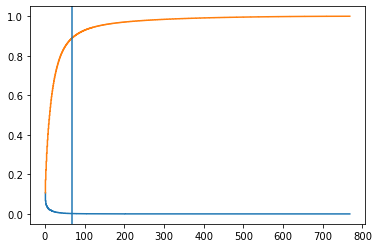

In [59]:
#run pca
V, cache = pcaifier(bert_embed, 69)

V: <class 'numpy.ndarray'> (768, 768)
Ordered_embeddings: <class 'numpy.ndarray'> (40000, 768)
X_reduced: (40000, 2)
X_reduced: (40000, 3)
X_reduced: (40000, 3)
X_reduced: (40000, 3)
X_reduced: (40000, 3)
X_reduced: (40000, 3)
X_reduced: (40000, 3)


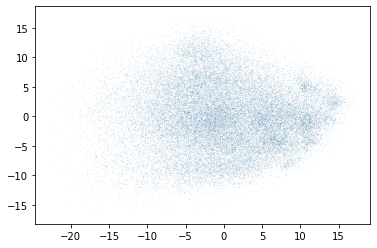

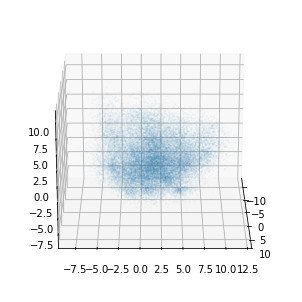

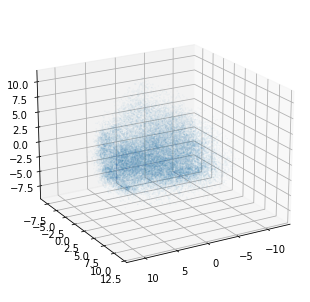

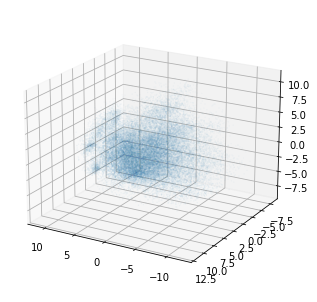

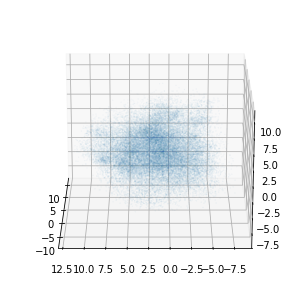

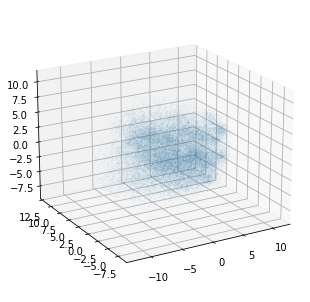

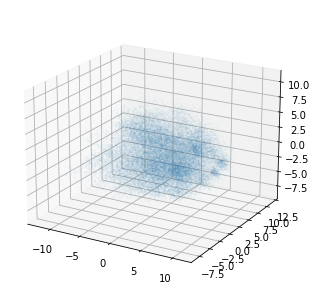

In [64]:
# visualize data 2 and 3 d
print("V:", type(V),V.shape)
print("Ordered_embeddings:",type(bert_embed), bert_embed.shape)
visualize_2D(bert_embed, V, cache)
for i in range(0,360,60):
      visualize_3D(bert_embed, V, cache,azim = i)

In [66]:
#add the reduced dimension column
bert_69 = (bert_embed - cache["mean"])/cache["std"]
bert_69 = bert_69@V[:, :69]
print(bert_69.shape)
print(bert_69)

(40000, 69)
[[-10.64470648  -1.9126585   -4.52524042 ...   1.8417669    0.5800884
    0.77524186]
 [  0.03749251  -0.38162246  -4.50002596 ...   1.14879447  -1.88041565
    0.38086657]
 [ -4.39336969  -4.11968495  -7.38557465 ...   1.10322078   0.83878581
    0.27520812]
 ...
 [  8.32799283  -4.66642807   2.55032612 ...   1.28448128   0.07724187
   -0.04622995]
 [ -4.80495178   0.30993358  -4.61826816 ...  -1.19527162   0.69469008
   -2.04070203]
 [  1.98382941  -4.33287116  -7.96282193 ...   0.73853527   1.48815207
   -0.42783276]]


In [68]:
df["Bert_embed_69"] = np.nan
for i in tqdm(range(0, len(all_card_combs))):
    df['Bert_embed_69'] = df['Bert_embed_69'].astype('object')
    df.at[i, 'Bert_embed_69'] = bert_69[i,:]
print(df)

100%|██████████| 40000/40000 [00:24<00:00, 1612.00it/s]

                               black_card  \
0      Hey Reddit! I’m _.Ask me anything.   
1      Hey Reddit! I’m _.Ask me anything.   
2      Hey Reddit! I’m _.Ask me anything.   
3      Hey Reddit! I’m _.Ask me anything.   
4      Hey Reddit! I’m _.Ask me anything.   
...                                   ...   
39995                 Make a haiku._,_,_.   
39996                 Make a haiku._,_,_.   
39997                 Make a haiku._,_,_.   
39998                 Make a haiku._,_,_.   
39999                 Make a haiku._,_,_.   

                                           white_card(s)  \
0                                                silence   
1      the illusion of choice in a late-stage capital...   
2                                              many bats   
3                                                 famine   
4                                  flesh-eating bacteria   
...                                                  ...   
39995  (the arrival of the pizza, mansp

In [71]:
import pickle
#save the final training set and cache
df.to_pickle("training_set_data_69")
with open('pca_cache_69.pkl', 'wb') as f:
    pickle.dump(cache, f)

### Visualization (optional)

In [128]:
def plot_3D_PCA_by_bc(df,bc,Color_configuration = "show_all"):

    #get X_reduced from the dataframe
    embed_69 = df['Bert_embed_69'].to_list()
    embed_69 = [embed_69[i].tolist()  for i in range(len(embed_69))]
    embed_69 = np.array(embed_69)
    
    print(embed_69.shape)

    #color configuration (have to use random??)
    colors = {}
    for key in bc:
        if Color_configuration == "show_all":
            colors[key] = (round(random.random(),1),round(random.random(),1),round(random.random(),1))
        else:
            colors[key] = 'black' if key == Color_configuration else 'moccasin'


    for i in range(0,360,60):
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.view_init(elev=20, azim=i)
        ax.scatter(embed_69[:,0], embed_69[:,1],embed_69[:,2], c=df['black_card'].map(colors), s = 0.01)

def plot_3D_PCA_by_wc(df,wc,Color_configuration = "show_all"):
        
    df = df.drop(index = [i for i in range(33000,40000)])
    
    #get X_reduced from the dataframe
    embed_69 = df['Bert_embed_69'].to_list()
    embed_69 = [embed_69[i].tolist()  for i in range(len(embed_69))]
    embed_69 = np.array(embed_69)
    
    print(embed_69.shape)

    #color configuration (have to use random??)
    colors = {}
    for key in wc:
        if Color_configuration == "show_all":
            colors[key] = (round(random.random(),1),round(random.random(),1),round(random.random(),1))
        else:
            colors[key] = 'black' if key == Color_configuration else 'moccasin'


    for i in range(0,360,60):
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.view_init(elev=20, azim=i)
        ax.scatter(embed_69[:,0], embed_69[:,1],embed_69[:,2], c=df['white_card(s)'].map(colors), s = 0.01)

(40000, 69)


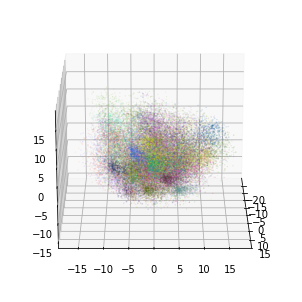

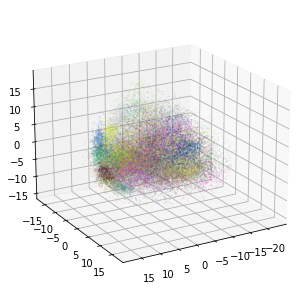

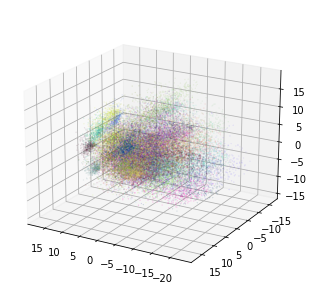

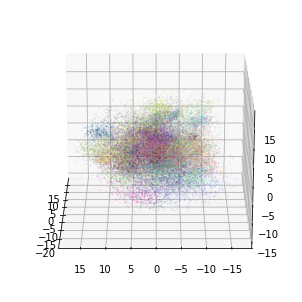

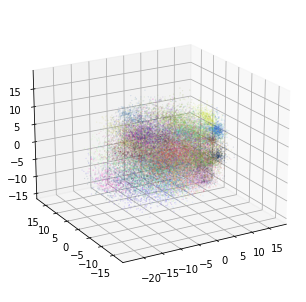

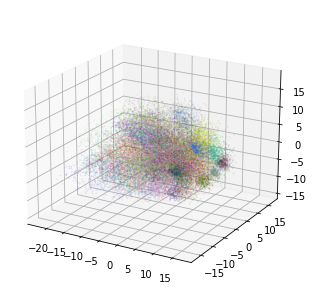

In [106]:
plot_3D_PCA_by_bc(df, bc, Color_configuration = "show_all")

(33000, 69)


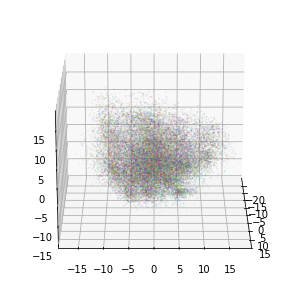

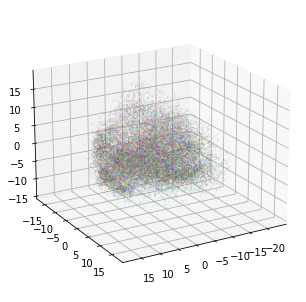

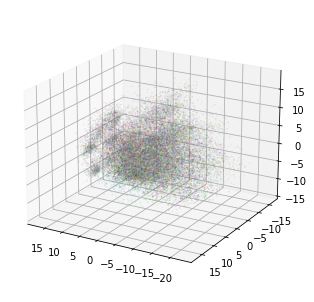

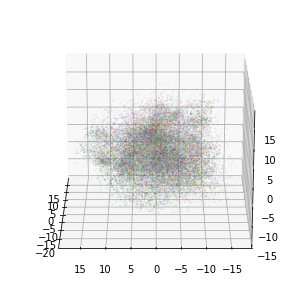

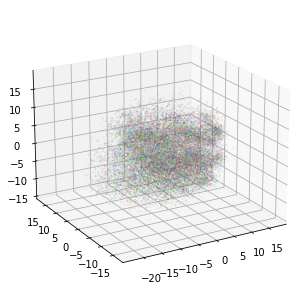

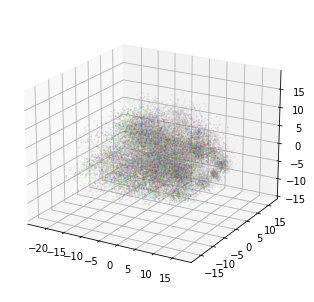

In [129]:
plot_3D_PCA_by_wc(df, wc, Color_configuration = "show_all")
